Block 1: Import libraries and create variables

In [1]:
import pandas as pd
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()
X = pd.DataFrame(diabetes.data,columns=diabetes.feature_names)
y = diabetes.target

X.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


Block 2: Import other necessary libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

Block 3: Create a function that:
 
A. Takes X and y as in the input

B. Split the X and y into train and test using train_test_split from sklearn

C. Fit a linear regression model to the training X and training y data

D. Get the predicted y data for X test from the model

E. Output (at least) the model fit (i.e., R^2 score = coefficient of determination)

In [3]:
def lin_reg(X, y):
  '''
  Will split X and y into train and test

  Will fit a linear regression model to the data

  Will get predicted y data for X test from the model

  Returns the model fit
  '''
  # split into train and test
  X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

  # fit linear regression model to data
  model = LinearRegression()
  model.fit(X_train, y_train)

  print('training r^2:', model.score(X_train, y_train))
  print('testing r^2:', model.score(X_test, y_test))
  print('y = ', np.round(model.coef_[0], 3), '*x + ', np.round(model.intercept_, 3))

  # predict y data for X test
  y_plot = model.predict(X_test)

  sns.scatterplot(x = X_test[X_test.columns[0]], y = y_test)
  sns.lineplot(x = X_test[X_test.columns[0]], y = y_plot, color= 'r')

Block 4: Show that this function works (i.e., try it with some of the data)

training r^2: 0.07708368099886165
testing r^2: 0.09857294273609096
y =  0.284 *x +  0.002


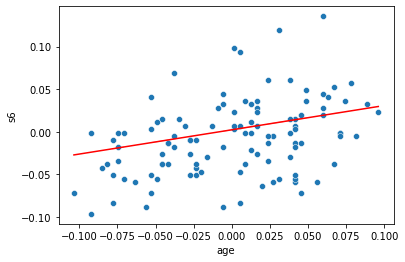

In [4]:
lin_reg(X[['age']], X['s6'])

Block 5: Then, using the function, find the best single feature (i.e., column) in X that best predicts y

training r^2: 0.8141295814000783
testing r^2: 0.7730603331077047
y =  0.887 *x +  -0.0


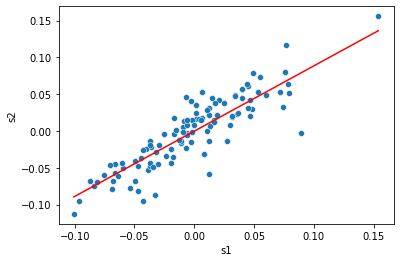

In [5]:
lin_reg(X[['s1']], X['s2'])

Block 6: Using object oriented programming, make a figure that has two subplots. On the left, put the training data as a scatterplot (x,y). On the right, the testing data as a scatterplot (x,y). Include the best fitting model line in both plots and include the R^2 value in both plots for the different fits.

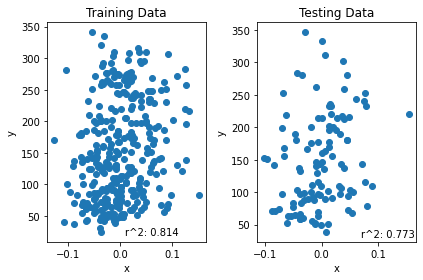

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)
model = LinearRegression()
model.fit(X_train, y_train)

fig, axes = plt.subplots(1, 2)

axes[0].scatter(X_train['s1'], y_train)
axes[1].scatter(X_test['s1'], y_test)

axes[0].set_xlabel('x')
axes[0].set_ylabel('y')
axes[0].set_title('Training Data')
axes[0].text(0.01, 20, 'r^2: 0.814')

axes[1].set_xlabel('x')
axes[1].set_ylabel('y')
axes[1].set_title('Testing Data')
axes[1].text(0.07, 30, 'r^2: 0.773')

plt.tight_layout()